In [1]:
from pyfile import eval, eq
from discopy.quantum.zx import Spider, Id
from spiders import W_old, Z, Swap, H, CZ, FSwap, X

import numpy as np
pi = np.pi

Understand how to bend W outputs to inputs

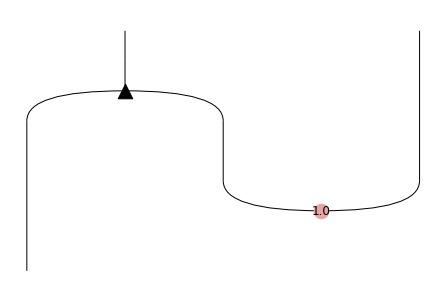

array([[0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]])

In [2]:
w_21 = W_old() @ Id(1) >> Id(1) @ X(2, 0, 1)
w_21.draw()
eval(w_21)

In [3]:
eq(w_21, Swap >> w_21)

True

In [4]:
eval(W_old(2, False))

array([[1., 0., 0., 1.],
       [0., 1., 0., 0.]])

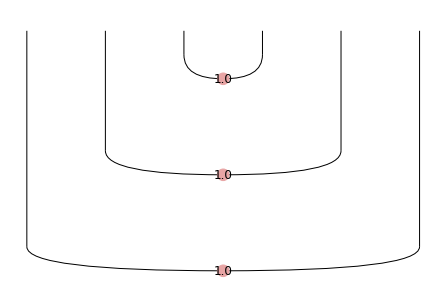

In [5]:
wcup = X(2, 0, 1)

def cup_nest(n):
    if n == 1:
        return wcup
    return Id(1) @ cup_nest(n - 1) @ Id(1) >> wcup

cup_nest(3).draw()

In [6]:
wcup = X(2, 0, 1)

def W2(ins, outs, transpose=True):
    if ins == 1:
        return W_old(outs, transpose)
    if ins == 0:
        return X(0, 1, 1) >> W_old(outs, transpose)
        
    w = W_old(ins + outs - 1, transpose) @ Id(ins - 1) >> Id(outs) @ cup_nest(ins - 1)

    return w.normal_form()
        

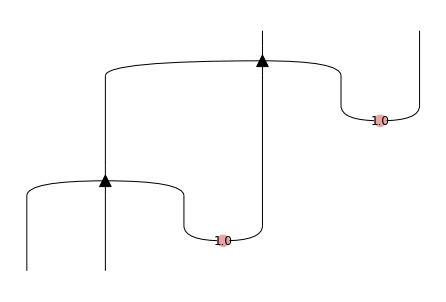

array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [2.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

In [7]:
c = W2(2, 2) >> W2(2, 2)
c.draw()
eval(c)

In [8]:
def wm(ins, outs):
    # trying to guess matrix form
    m = np.zeros((2**outs, 2**ins))
    for i in range(2**ins - 1):
        bi = format(i, '0' + str(ins) + 'b')
        if bi.count('0') == 1:
            m[0][i] = 1.0
        
    for j in range(outs): # all powers of 2 
        m[2**j][-1] = 1.0
    return m


In [9]:
wm(2, 3)

array([[0., 1., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [10]:
wm(2, 2)

array([[0., 1., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.]])

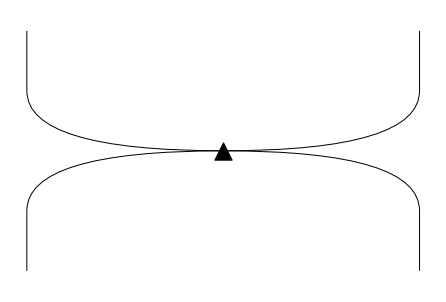

In [11]:
from spiders import W, eval, W_old

W(2, 2).draw()

In [12]:
eval(W(2, 3))

array([[0., 1., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

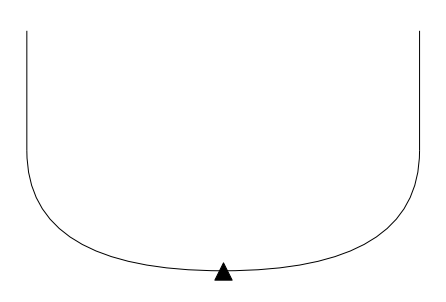

array([[0., 1., 1., 0.]])

In [13]:
W(2, 0).draw()
eval(W(2, 0))


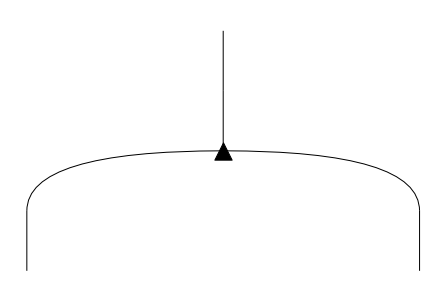

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.]])

In [14]:
W().draw()
eval(W())

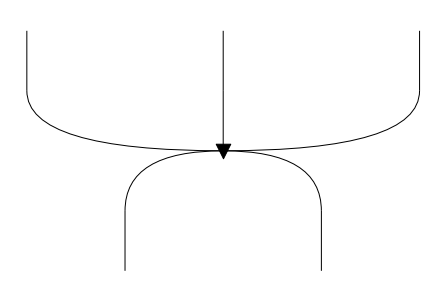

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 1., 0., 0., 0.]])

In [15]:
a = W(3, 2, down=True)
a.draw()
eval(a)

In [16]:
wm(2, 3).transpose()

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 1., 0., 0., 0.]])